This is all using GDAS. I don't think I want that- I think I want regular GFS (not positive.)

In [7]:

import fsspec
import xarray as xr

In [ ]:
# 1. Point s3fs at the public bucket (no credentials needed)
fs = fsspec.fileSystem("s3", anon=True)
date = 20250624
# 2. List a directory (e.g. daily time_series files for soil moisture)
path = f"noaa-gfs-bdp-pds/gdas.{date}/00/atmos/"  # adjust to your year/month dynamically
file = fs.glob(
    path + "gdas.t00z.sfcanl.nc"
) 

with fs.open(file) as f:
    ds = xr.open_dataset(f, engine="netcdf4")


AttributeError: 'list' object has no attribute 'lstrip'

In [5]:
gfs = xr.open_dataset(file, engine="netcdf4")

ValueError: can only read bytes or file-like objects with engine='scipy' or 'h5netcdf'

In [ ]:
grib_file = "data/gfs/gdas.t00z.sfluxgrbf000.grib2"
# 3. Open as a single concatenated Dataset
ds_surface = xr.open_dataset(
    grib_file,
    engine="cfgrib",
    filter_by_keys={'typeOfLevel': 'surface'}, #can also add decode_coords="all" for compatability with rioxarray if needed. 
)

grib_file = "data/gfs/gdas.t00z.sfluxgrbf000.grib2"
# 3. Open as a single concatenated Dataset
ds_below = xr.open_dataset(
    grib_file,
    engine="cfgrib",
    filter_by_keys={'typeOfLevel': 'depthBelowLandLayer', 'level': 0.0},
)

In [4]:
ds_surface

<xarray.Dataset> Size: 547MB
Dimensions:     (latitude: 1536, longitude: 3072)
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 12kB 89.91 89.79 89.68 ... -89.79 -89.91
  * longitude   (longitude) float64 25kB 0.0 0.1172 0.2344 ... 359.6 359.8 359.9
    valid_time  datetime64[ns] 8B ...
Data variables: (12/29)
    sp          (latitude, longitude) float32 19MB ...
    orog        (latitude, longitude) float32 19MB ...
    t           (latitude, longitude) float32 19MB ...
    cnwat       (latitude, longitude) float32 19MB ...
    sdwe        (latitude, longitude) float32 19MB ...
    sde         (latitude, longitude) float32 19MB ...
    ...          ...
    sdswrf      (latitude, longitude) float32 19MB ...
    sdlwrf      (latitude, longitude) float32 19MB ...
    suswrf      (latitude, longitude) float32 19MB ...
    sulwrf      (latitude, longitude) float32 19MB ...
    lsm         (latitude, longitude) float32 19MB ...
    siconc      (latitude, longitude) float32 19MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-06-13T20:35 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
ds_surface_us = ds_surface.sel(longitude=slice((180-126.59)+180,(180-65.6)+180), latitude=slice(50.59, 24.4))
ds_surface_us

<xarray.Dataset> Size: 14MB
Dimensions:     (latitude: 224, longitude: 521)
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 2kB 50.55 50.43 50.32 ... 24.66 24.54 24.43
  * longitude   (longitude) float64 4kB 233.4 233.6 233.7 ... 294.1 294.3 294.4
    valid_time  datetime64[ns] 8B ...
Data variables: (12/29)
    sp          (latitude, longitude) float32 467kB ...
    orog        (latitude, longitude) float32 467kB ...
    t           (latitude, longitude) float32 467kB ...
    cnwat       (latitude, longitude) float32 467kB ...
    sdwe        (latitude, longitude) float32 467kB ...
    sde         (latitude, longitude) float32 467kB ...
    ...          ...
    sdswrf      (latitude, longitude) float32 467kB ...
    sdlwrf      (latitude, longitude) float32 467kB ...
    suswrf      (latitude, longitude) float32 467kB ...
    sulwrf      (latitude, longitude) float32 467kB ...
    lsm         (latitude, longitude) float32 467kB ...
    siconc      (latitude, longitude) float32 467kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-06-13T20:35 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
ds_surface_us[['wilt','fldcp','SUNSD', 'sltyp']]

<xarray.Dataset> Size: 2MB
Dimensions:     (latitude: 224, longitude: 521)
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 2kB 50.55 50.43 50.32 ... 24.66 24.54 24.43
  * longitude   (longitude) float64 4kB 233.4 233.6 233.7 ... 294.1 294.3 294.4
    valid_time  datetime64[ns] 8B ...
Data variables:
    wilt        (latitude, longitude) float32 467kB ...
    fldcp       (latitude, longitude) float32 467kB ...
    SUNSD       (latitude, longitude) float32 467kB ...
    sltyp       (latitude, longitude) float32 467kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-06-13T20:35 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
ds_below

<xarray.Dataset> Size: 170MB
Dimensions:              (depthBelowLandLayer: 3, latitude: 1536,
                          longitude: 3072)
Coordinates:
    time                 datetime64[ns] 8B ...
    step                 timedelta64[ns] 8B ...
  * depthBelowLandLayer  (depthBelowLandLayer) float64 24B 0.0 0.1 0.4
  * latitude             (latitude) float64 12kB 89.91 89.79 ... -89.79 -89.91
  * longitude            (longitude) float64 25kB 0.0 0.1172 ... 359.8 359.9
    valid_time           datetime64[ns] 8B ...
Data variables:
    st                   (depthBelowLandLayer, latitude, longitude) float32 57MB ...
    soilw                (depthBelowLandLayer, latitude, longitude) float32 57MB ...
    soill                (depthBelowLandLayer, latitude, longitude) float32 57MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-06-13T20:35 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
ds_below_us = ds_below.sel(longitude=slice((180-126.59)+180,(180-65.6)+180), latitude=slice(50.59, 24.4))

In [13]:
us_soilw = ds_below_us['soilw']

In [ ]:
us_soilw_masked = us_soilw.where(us_soilw != us_soilw.attrs['GRIB_missingValue']) # Remove the missing values (like ocean, etc) so plots are better

In [ ]:
us_soilw_masked

<xarray.DataArray 'soilw' (depthBelowLandLayer: 3, latitude: 224, longitude: 521)> Size: 1MB
array([[[0.266, 0.266, 0.266, ..., 0.277, 0.33 , 0.293],
        [0.295, 0.297, 0.292, ..., 0.329, 0.336, 0.336],
        [0.291, 0.291, 0.292, ..., 0.331, 0.335, 0.335],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[0.278, 0.278, 0.277, ..., 0.267, 0.349, 0.282],
        [0.304, 0.307, 0.302, ..., 0.31 , 0.306, 0.306],
        [0.303, 0.302, 0.302, ..., 0.302, 0.309, 0.305],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[0.281, 0.281, 0.28 , ..., 0.415, 0.402, 0.421],
        [0.309, 0.314, 0.308, ..., 0.354, 0.302, 0.302],
        [0.309, 0.31 , 0.308, ..., 0.417, 0.321, 0.411],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]]],
      shape=(3, 224, 521), dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2025-06-02
    step                 timedelta64[ns] 8B 00:00:00
  * depthBelowLandLayer  (depthBelowLandLayer) float64 24B 0.0 0.1 0.4
  * latitude             (latitude) float64 2kB 50.55 50.43 ... 24.54 24.43
  * longitude            (longitude) float64 4kB 233.4 233.6 ... 294.3 294.4
    valid_time           datetime64[ns] 8B 2025-06-02
Attributes: (12/30)
    GRIB_paramId:                             260185
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      4718592
    GRIB_typeOfLevel:                         depthBelowLandLayer
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Volumetric soil moisture content
    GRIB_shortName:                           soilw
    GRIB_units:                               Proportion
    long_name:                                Volumetric soil moisture content
    units:                                    Proportion
    standard_name:                            unknown

In [29]:
us_soilw_surface_masked = us_soilw_masked.sel(depthBelowLandLayer='0.')

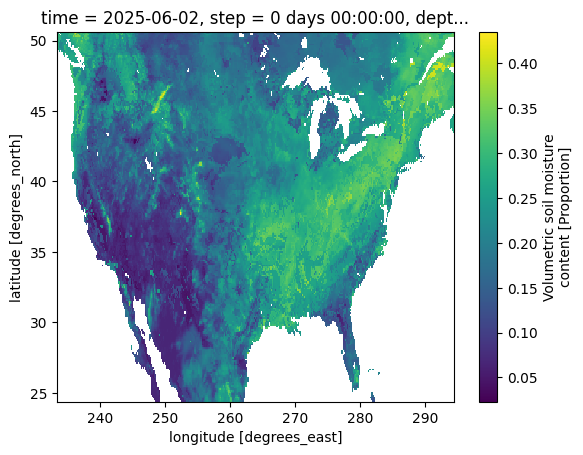

In [30]:
us_soilw_surface_masked.plot()

Would I want to use something like ds.time.dt.floor("D") to resample everything back to the zero hour of the day? I guess this is a good way to aggregate data from different hours into one day. Maybe if I pull two 6 hourly forecasts per day?